In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 

In [15]:
data= pd.read_csv('Week2_data.csv')


data['Throughput (Bytes/ms)'] = (data['Total DL (Bytes)'] + data['Total UL (Bytes)']) / data['Dur. (ms)']


In [16]:
if 'Packet_Loss' not in data.columns:
    data['Packet_Loss'] = 0.05  

if 'Estimated_Retransmissions' not in data.columns:
    data['Estimated_Retransmissions'] = 0.02  


In [17]:
features = ['Throughput (Bytes/ms)', 'Packet_Loss', 'Estimated_Retransmissions']

data = data.dropna(subset=features)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_descriptions = pd.DataFrame(cluster_centers, columns=features)
print("Cluster centers:\n", cluster_descriptions)

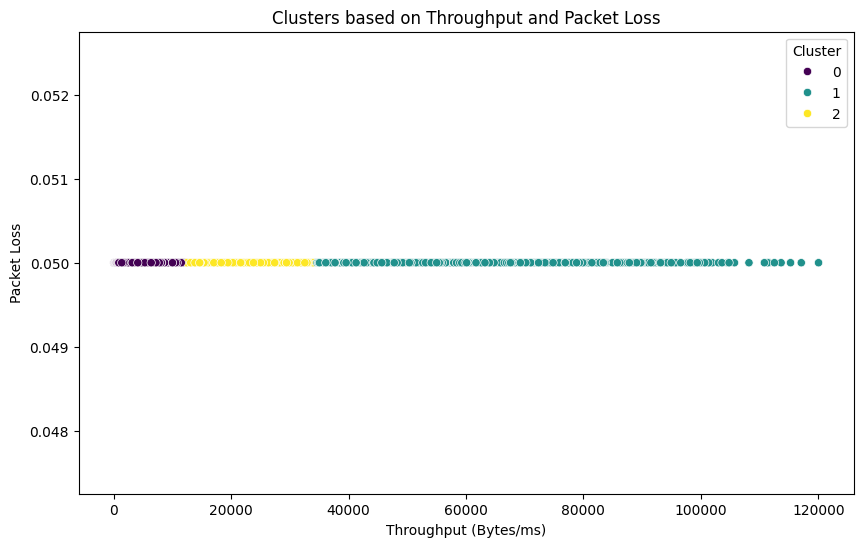

Cluster distribution:
 Cluster
0    126097
2     19443
1      4460
Name: count, dtype: int64


In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Throughput (Bytes/ms)', y='Packet_Loss', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters based on Throughput and Packet Loss')
plt.xlabel('Throughput (Bytes/ms)')
plt.ylabel('Packet Loss')
plt.show()

print("Cluster distribution:\n", data['Cluster'].value_counts())
